In [3]:
#Bank Loan approval predition using aritificial neural network
#In this project, we will build and train a deep neaural network model to predict the likelyhood of a liability customer buying personal loans based on customer features.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import Accuracy

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 



In [5]:
bank_df = pd.read_csv("./dataset/UniversalBank.csv")


In [6]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
#showing 1st 10 rows
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [8]:
#showing last 10 rows
bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [9]:
#no of samples ind dataset
bank_df.shape



(5000, 14)

In [10]:
# ID: Customer ID
# Age: Customer Age
# Experience: Amount of work experience in years
# Income: Amount of annual income (in thousands)
# Zipcode: Zipcode of where customer lives
# Family: Number of family members
# CCAvg: Average monthly credit card spendings
# Education: Education level (1: Bachelor, 2: Master, 3: Advanced Degree)
# Mortgage: Mortgage of house (in thousands)
# Securities Account: Boolean of whether customer has a securities account
# CD Account: Boolean of whether customer has Certificate of Deposit account
# Online: Boolean of whether customer uses online banking
# CreditCard: Does the customer use credit card issued by the bank?
# Personal Loan: This is the target variable (Binary Classification Problem)

In [11]:
# EXPLORATORY DATA ANALYSIS


In [12]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [13]:
#obtaining statistical summary of data_frame
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
#for better visualisation

In [15]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [16]:
#checking no of null values
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [17]:
#no missing values are present
avg_age = bank_df["Age"].mean()
Creditcard_percent = ( sum(bank_df["CreditCard"] == 1) / len(bank_df) ) * 100
Personal_loan_percentage = ( sum(bank_df["Personal Loan"] == 1) / len(bank_df) ) * 100 



In [18]:
print(avg_age)
print(Creditcard_percent)
print(Personal_loan_percentage)

45.3384
29.4
9.6


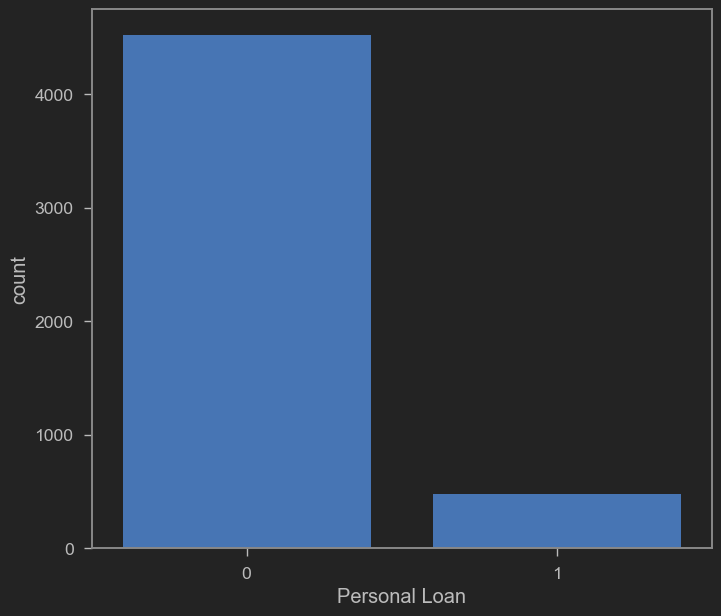

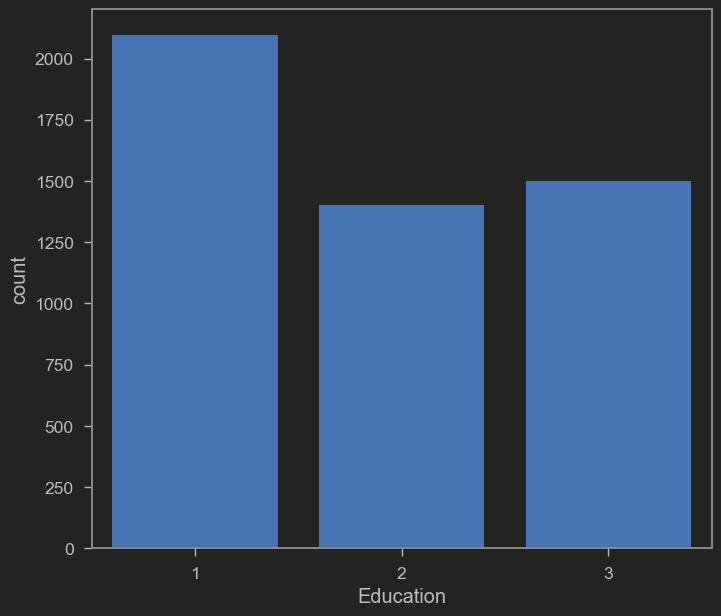

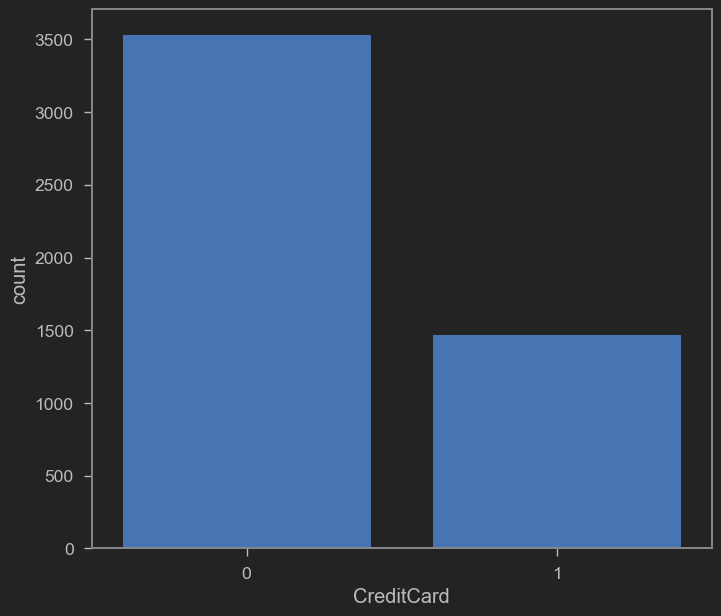

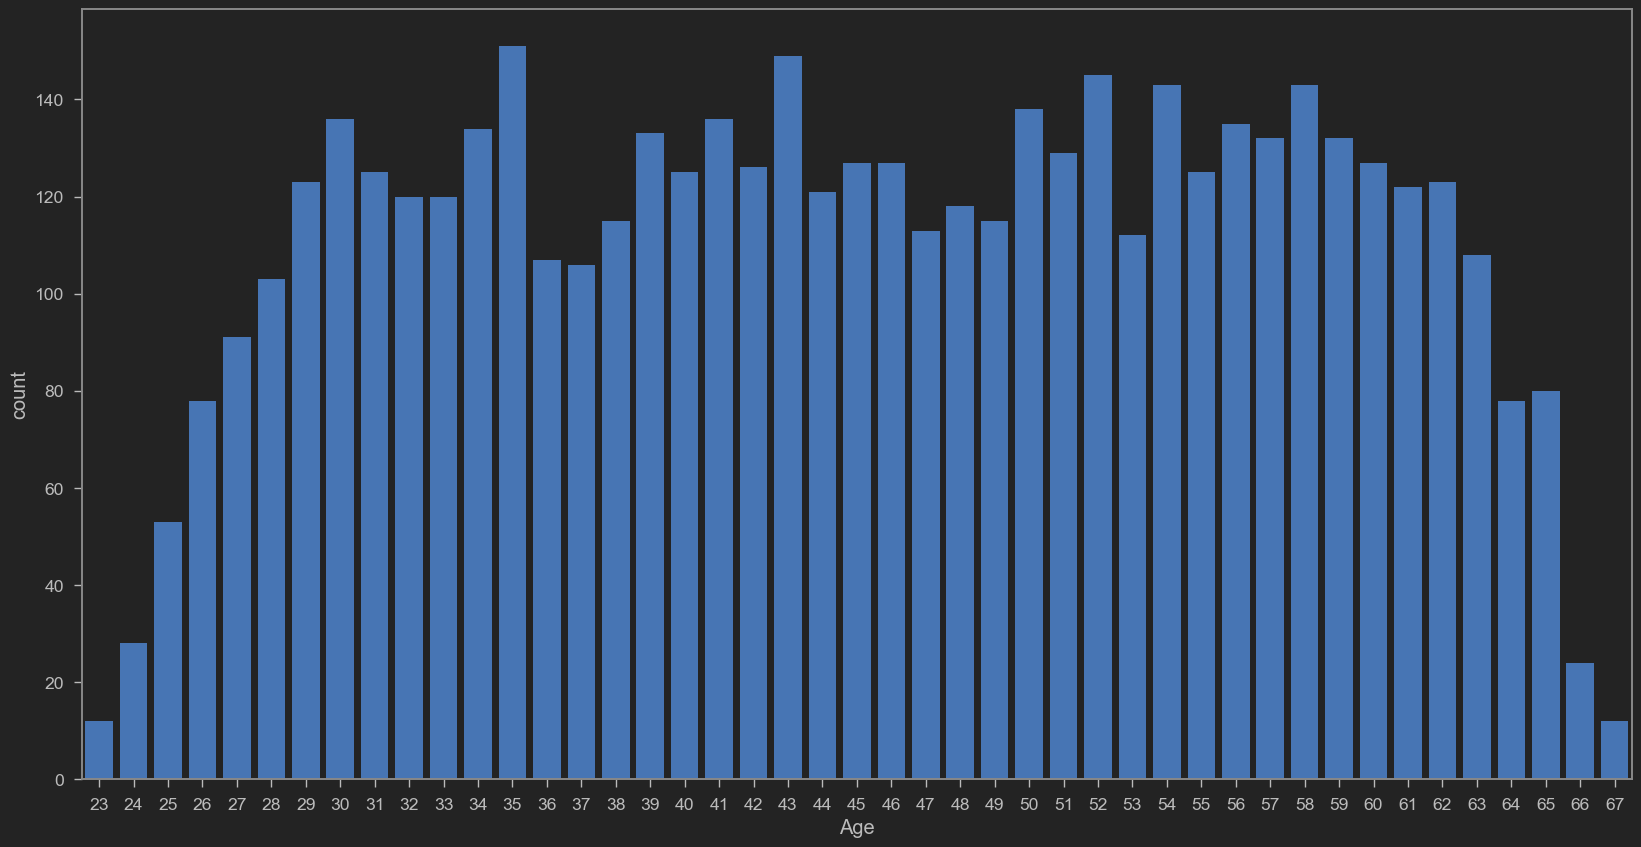

In [19]:
#Performing Data visulization
#visualising personal loan column

sns.countplot(x=bank_df["Personal Loan"])
plt.show()
sns.countplot(x = bank_df["Education"])
plt.show()
sns.countplot(x=bank_df["CreditCard"])
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x=bank_df["Age"])
plt.savefig('age.png', facecolor='w', bbox_inches='tight')
plt.show()



C:\Users\Gaurav\AppData\Local\Temp\ipykernel_12944\3540293401.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_df["Income"])


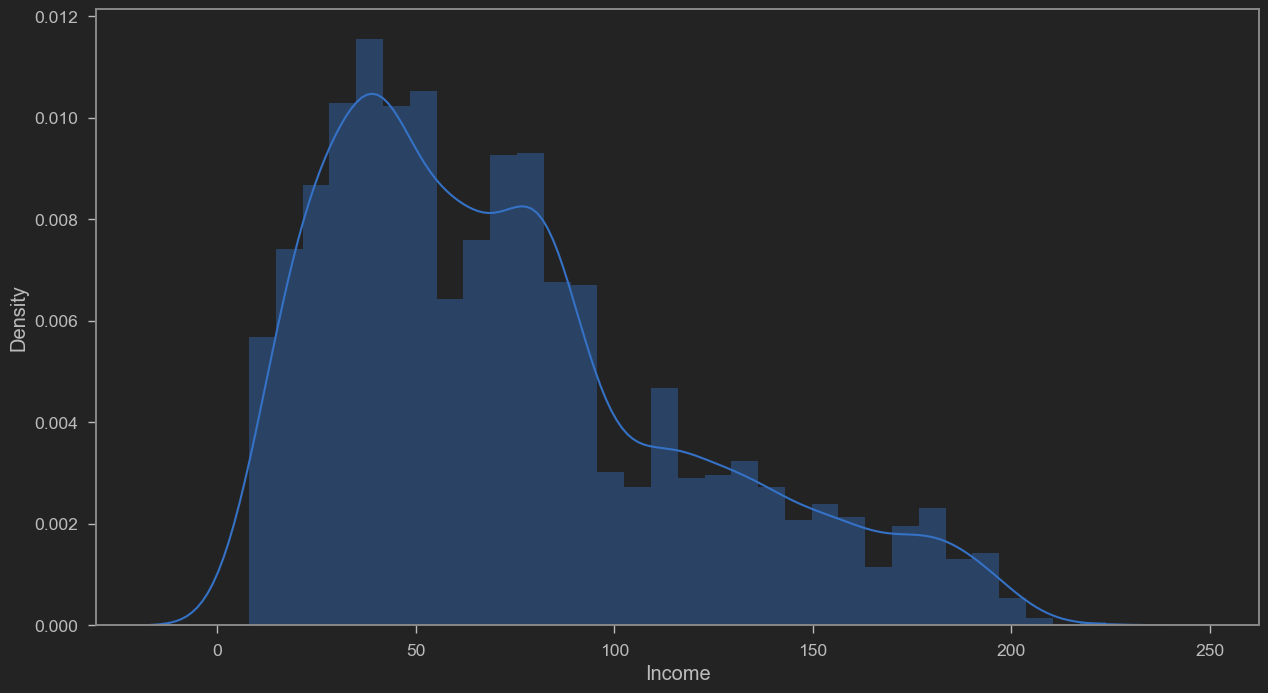

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(bank_df["Income"])
plt.savefig('income.png',facecolor = 'w', bbox_inches = 'tight')
plt.show()

#Data is skewed with less custumers earning more than 100K. Most of the people earn between 45K and 60 K


In [21]:
#creating two classes of dataframe: One with personal loan and other with no personal loan
personal_loans = bank_df[bank_df['Personal Loan'] == 1]
no_personalloans = bank_df[bank_df['Personal Loan'] == 0]

In [22]:
personal_loans.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


In [23]:
no_personalloans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.132301,11.456672,-3.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [24]:
#average income of customers with personal loan is 144.74K and CCavg is 3.905K
#average income of customers without personal load in 66.23K and CCavg is 1.729K

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_12944\3378448616.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personal_loans["Income"],label = "approved")
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_12944\3378448616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_personalloans["Incom

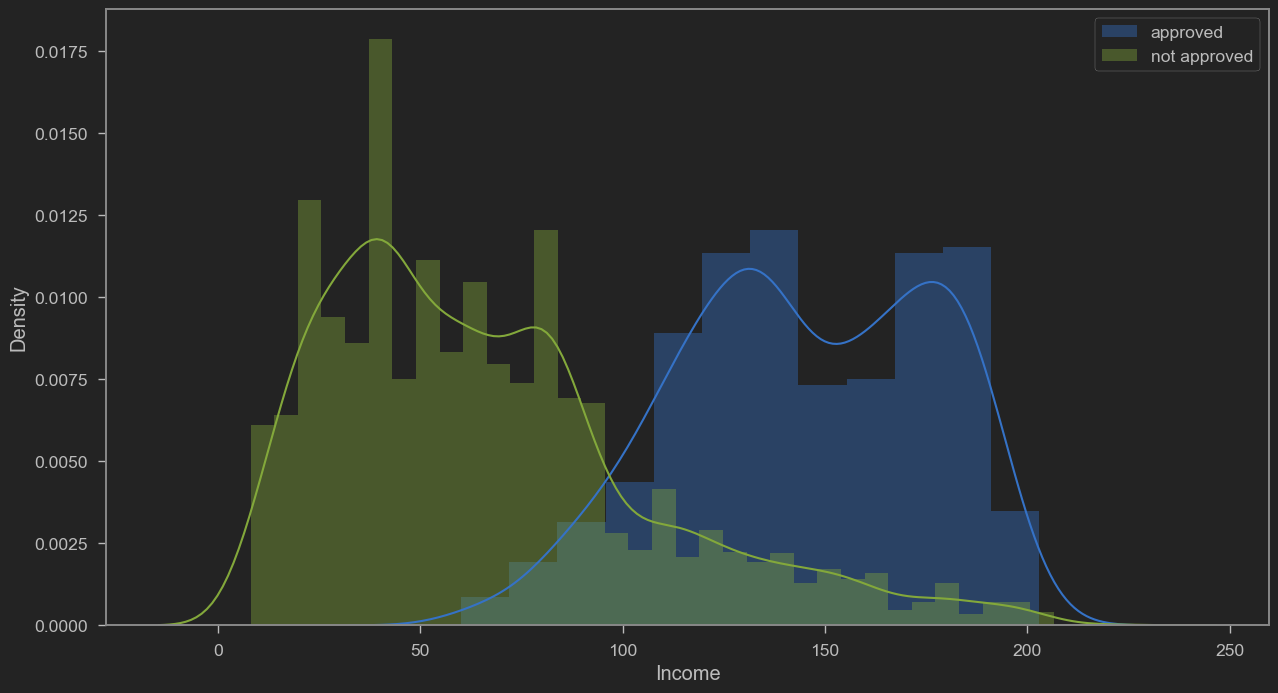

In [25]:
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["Income"],label = "approved")
sns.distplot(no_personalloans["Income"],label="not approved")
plt.legend()
plt.savefig("approved_not_approved.png",facecolor = 'w', bbox_inches = 'tight')
plt.show()


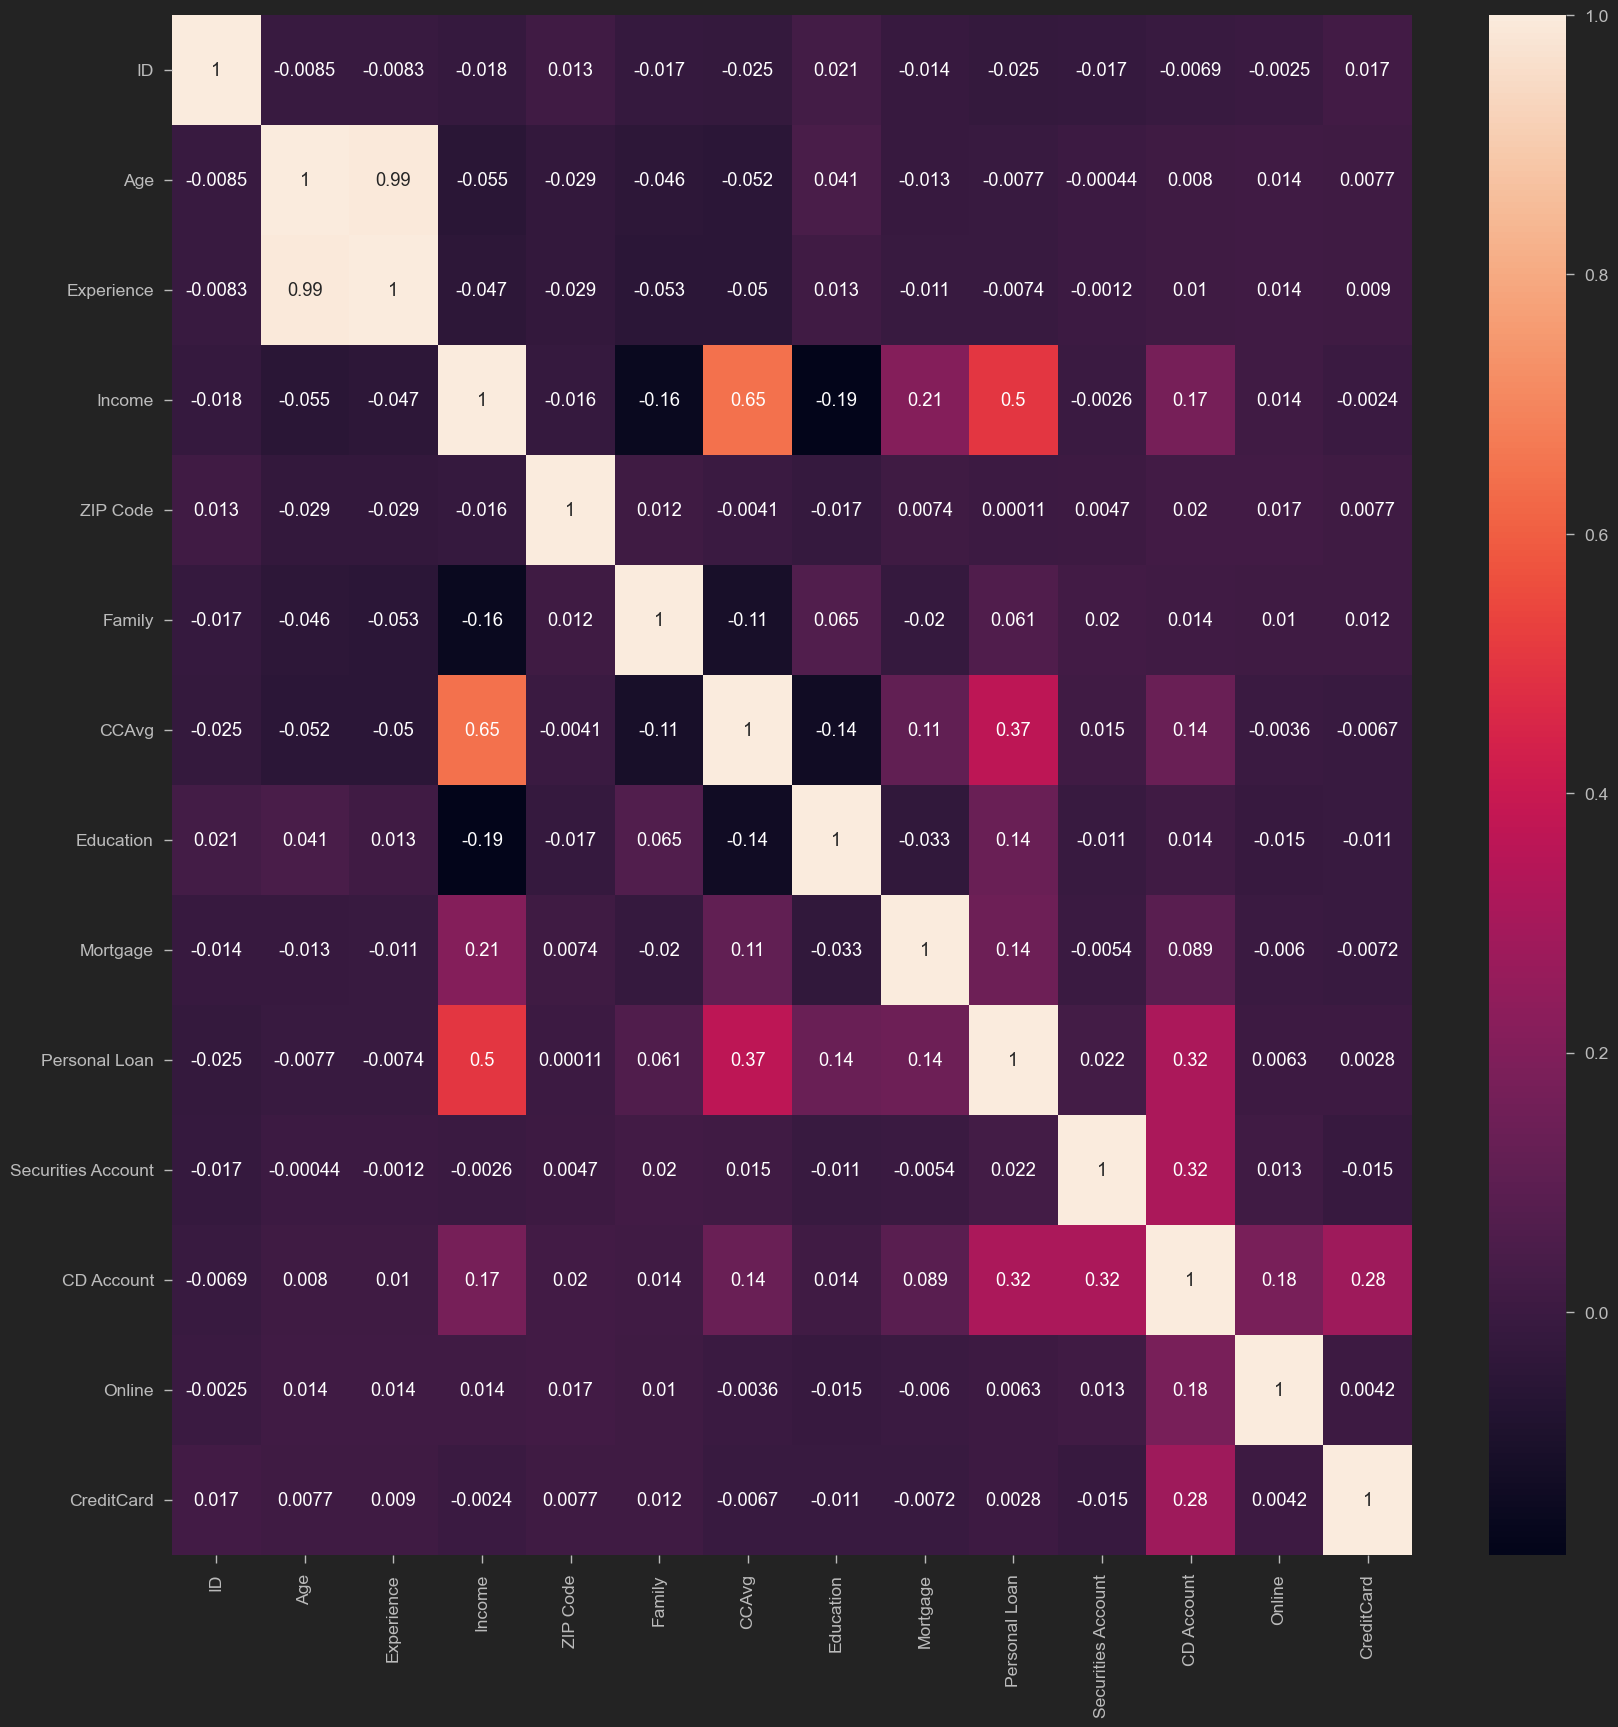

In [26]:
cm = bank_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True)
plt.savefig('heatmap.png',facecolor = 'w', bbox_inches = 'tight')
plt.show()
##correlation plot
#strong positive correlation between experience and age
#strong positive correlation between ccavg and income

<Figure size 1500x800 with 0 Axes>

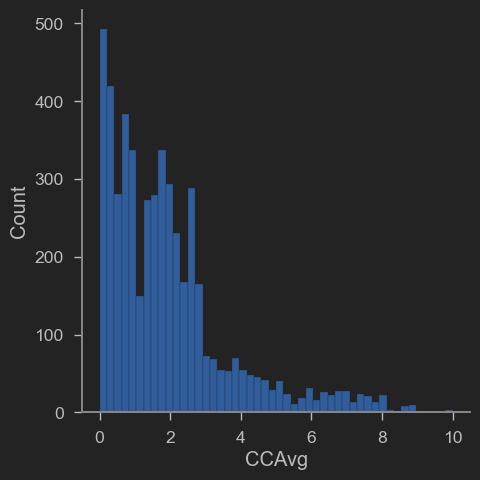

In [27]:
#distribution of average card spending
plt.figure(figsize=(15,8))
sns.displot(bank_df["CCAvg"])
plt.show()

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_12944\3143202822.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personal_loans["CCAvg"])
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_12944\3143202822.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_personalloans["CCAvg"])


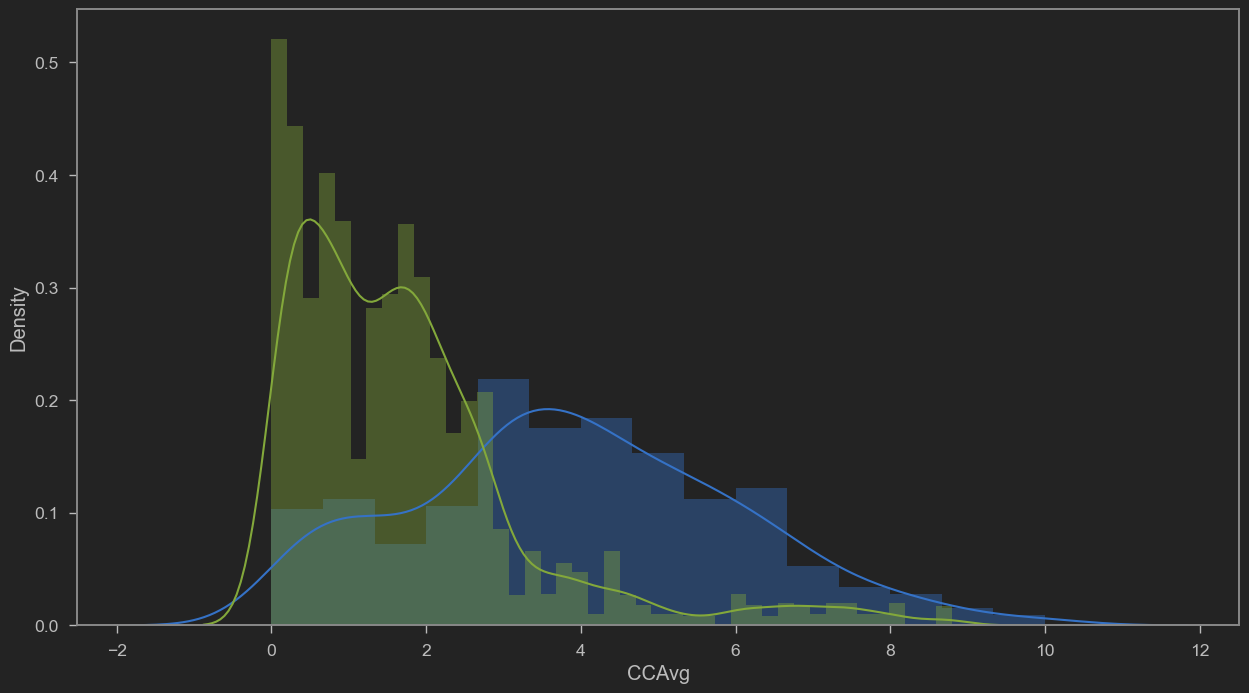

In [28]:
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["CCAvg"])
sns.distplot(no_personalloans["CCAvg"])
plt.show()

In [29]:
#Preparing the data before training the model


In [30]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [31]:
from tensorflow.keras.utils import to_categorical
X = bank_df.drop(columns=["Personal Loan"])
y = bank_df["Personal Loan"]

X

# Specify model input features (all data except for the target variable) 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [32]:
y = to_categorical(y)
y
# Model output (target variable)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [78]:
#scaling the data before training the model
#splitting the data into training and test data


from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape





((4500, 13), (500, 13), (4500, 2), (500, 2))

In [79]:
ann_model = keras.Sequential()

ann_model.add(Dense(250,input_dim = 13, kernel_initializer='normal', activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500,activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500,activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(500,activation='relu'))
ann_model.add(Dropout(0.4))
ann_model.add(Dense(250, activation='linear'))
ann_model.add(Dropout(0.4))

#adding output dense layer with softmax activation layer

ann_model.add(Dense(2,activation='softmax'))


ann_model.summary()




c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 250)            │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 500)            │       125,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │           502 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755,752 (2.88 MB)

 Trainable params: 755,752 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
##compilation and training of deep learning models

#custum functions for f1, precision and call

from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred,0,1)))
    precision = true_positives / (predicted_positives + K.epsilon()) #prevent division by zero
    return precision

def f1_m(y_true, y_pred):
    recall = recall_m(y_true, y_pred)
    precision = precision_m(y_true, y_pred)

    return 2*( (recall * precision) / (recall + precision + K.epsilon()) ) 




In [86]:
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1_m])

In [87]:
history = ann_model.fit(X_train,y_train,epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - f1_m: 0.9908 - loss: 0.0388 - val_f1_m: 0.9623 - val_loss: 0.1462
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - f1_m: 0.9892 - loss: 0.0287 - val_f1_m: 0.9547 - val_loss: 0.1657
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - f1_m: 0.9864 - loss: 0.0404 - val_f1_m: 0.9709 - val_loss: 0.2564
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - f1_m: 0.9882 - loss: 0.0356 - val_f1_m: 0.9612 - val_loss: 0.1388
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - f1_m: 0.9890 - loss: 0.0321 - val_f1_m: 0.9591 - val_loss: 0.1460
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - f1_m: 0.9906 - loss: 0.0279 - val_f1_m: 0.9547 - val_loss: 0.2343
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - f1_m: 0.9890 - loss: 0.0445 - val_f1_m: 0.9655 - val_loss: 0.2096
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - f1_m: 0.9936 - loss: 0.0225 - val_f1_m: 0.9612 - val_loss: 0.2207
Epoch 9/20
113/113 ━━━━━━━━━━━━━

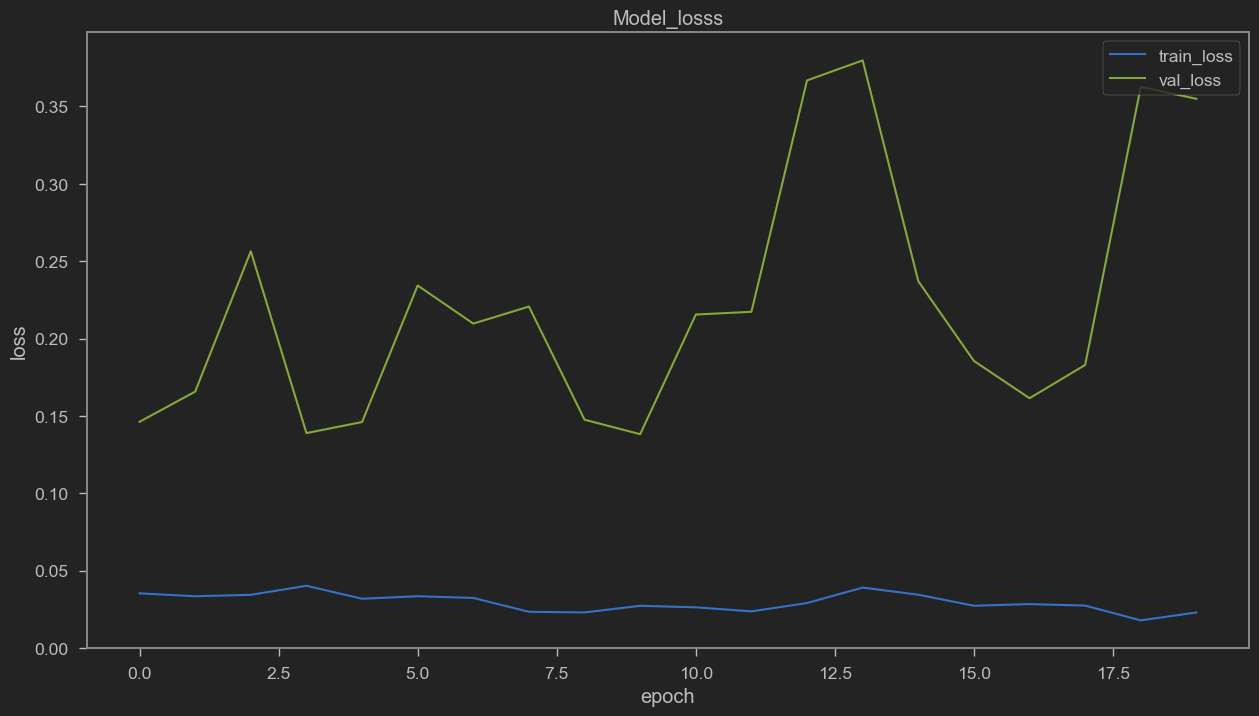

In [88]:
##Plotting the model performance accross the epochs

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_losss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'] ,loc = 'upper right')
plt.savefig('model_loss.png', facecolor = 'w', bbox_inches = 'tight')
plt.show()

In [61]:
##Evaluating the model performance


In [89]:
predictions = ann_model.predict(X_test)
predict = []

for i in predictions:
    ##print(i)
    predict.append(np.argmax(i))

##print(predict)
    

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [90]:
from sklearn import metrics
y_test_new = np.argmax(y_test,axis=1)

f1_test = metrics.f1_score(y_test_new,predict)
prec = metrics.precision_score(y_test_new,predict)
rec = metrics.recall_score(y_test_new,predict)
acc = metrics.accuracy_score(y_test_new, predict)

print("F1 score:{:.4f}".format(f1_test))
print("Precision:{:.4f}".format(prec))
print("Recall:{:.4f}".format(rec))
print("Accuracy:{:.4f}".format(acc))

##print(y_test)
##since y was one hot encoded

F1 score:0.9126
Precision:0.9792
Recall:0.8545
Accuracy:0.9820


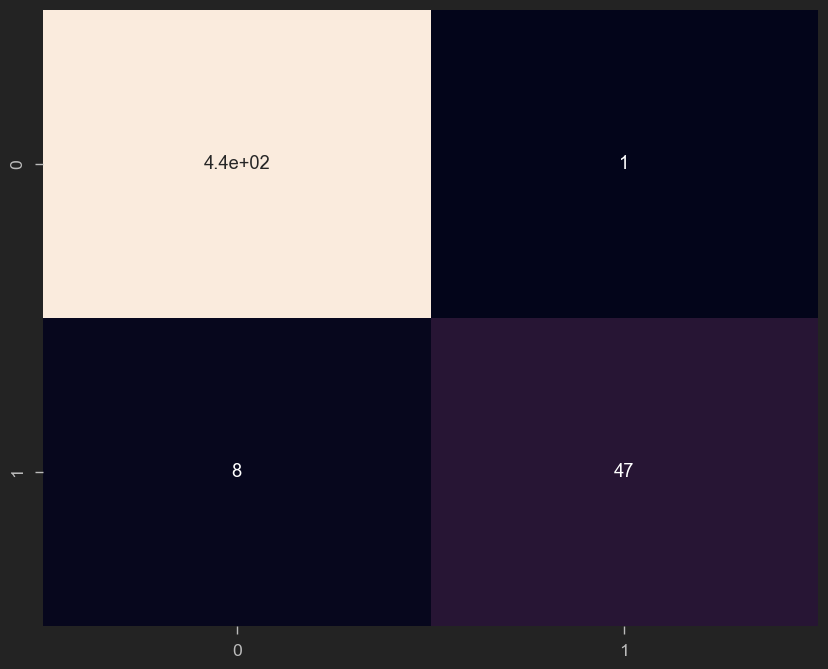

In [91]:
conf_mat = metrics.confusion_matrix(y_test_new, predict)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, cbar=False)
plt.savefig('conf_matrix.png', facecolor='w', bbox_inches='tight')
plt.show()

In [92]:
print(metrics.classification_report(y_test_new,predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       445
           1       0.98      0.85      0.91        55

    accuracy                           0.98       500
   macro avg       0.98      0.93      0.95       500
weighted avg       0.98      0.98      0.98       500

